In [133]:
import keras
import matplotlib.pyplot as plt

In [134]:
import keras 

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

toto_images = test_images

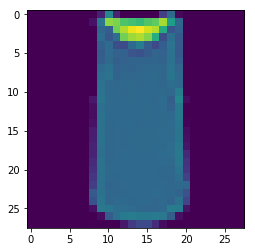

In [135]:
plt.imshow(train_images[2])

In [136]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [137]:
train_images = train_images/255
test_images = test_images/255

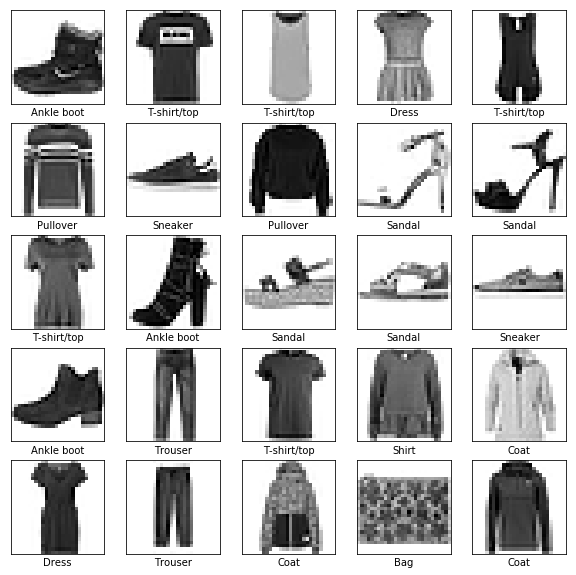

In [138]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    #plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [139]:
vector_len = train_images[0].shape[0]*train_images[0].shape[0]
print(train_images[0].shape[0])

28


In [140]:
train_images = train_images.reshape(train_images.shape[0],vector_len)
test_images = test_images.reshape(test_images.shape[0],vector_len)
train_images.shape

(60000, 784)

In [141]:
train_labels[0]

9

In [226]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

model = Sequential()
model.add(Dense(128,input_dim = 28*28 , activation ="relu"))
model.add(Dropout(0.4))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation = "softmax"))

model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics= ["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_45 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [227]:
history = model.fit(train_images,train_labels ,validation_data=(test_images,test_labels), epochs=50 , batch_size= 280 , verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 2s - loss: 0.7528 - acc: 0.7347 - val_loss: 0.5090 - val_acc: 0.8160
Epoch 2/50
 - 1s - loss: 0.4882 - acc: 0.8262 - val_loss: 0.4314 - val_acc: 0.8448
Epoch 3/50
 - 1s - loss: 0.4323 - acc: 0.8451 - val_loss: 0.4079 - val_acc: 0.8562
Epoch 4/50
 - 1s - loss: 0.4109 - acc: 0.8536 - val_loss: 0.3917 - val_acc: 0.8617
Epoch 5/50
 - 1s - loss: 0.3905 - acc: 0.8589 - val_loss: 0.3825 - val_acc: 0.8636
Epoch 6/50
 - 1s - loss: 0.3744 - acc: 0.8646 - val_loss: 0.3759 - val_acc: 0.8658
Epoch 7/50
 - 1s - loss: 0.3660 - acc: 0.8664 - val_loss: 0.3661 - val_acc: 0.8732
Epoch 8/50
 - 1s - loss: 0.3582 - acc: 0.8695 - val_loss: 0.3563 - val_acc: 0.8727
Epoch 9/50
 - 1s - loss: 0.3475 - acc: 0.8731 - val_loss: 0.3524 - val_acc: 0.8737
Epoch 10/50
 - 1s - loss: 0.3411 - acc: 0.8740 - val_loss: 0.3521 - val_acc: 0.8784
Epoch 11/50
 - 1s - loss: 0.3335 - acc: 0.8774 - val_loss: 0.3461 - val_acc: 0.8769
Epoch 12/50
 - 1s - loss: 0.3277 - 

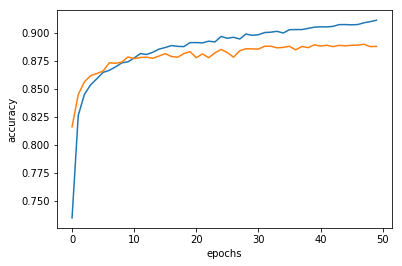

In [228]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

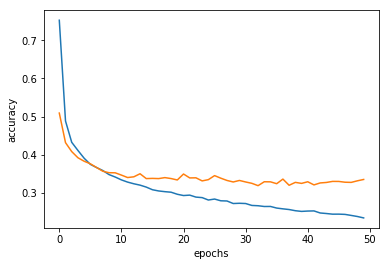

In [229]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [230]:
predict = model.predict(test_images)

In [231]:
predict[0]

array([5.5832408e-11, 8.7240233e-09, 1.0502517e-10, 8.7749008e-10,
       1.7965299e-10, 1.1733794e-04, 2.1683765e-10, 9.4487751e-03,
       3.8488487e-10, 9.9043381e-01], dtype=float32)

In [232]:
import numpy as np
np.argmax(predict[0])

9

In [233]:
def plot_image(i,prediction_array,true_label,img):
    prediction_array,true_label,img = predict[i],test_labels[i],toto_images[i]
    plt.grid("False")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predict_label = np.argmax(prediction_array)
    if(predict_label == true_label):
        color = "Blue"
    else:
        color = "red"
        
    plt.xlabel("{} {} ({})".format(class_names[predict_label],
                                       100*np.max(prediction_array),
                                       class_names[true_label],color=color))
    


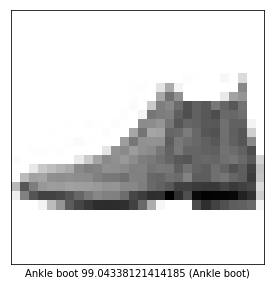

In [234]:
i = 0 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i,predict,test_labels,test_images)
plt.show()

In [235]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(range(10), class_names, rotation=45)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

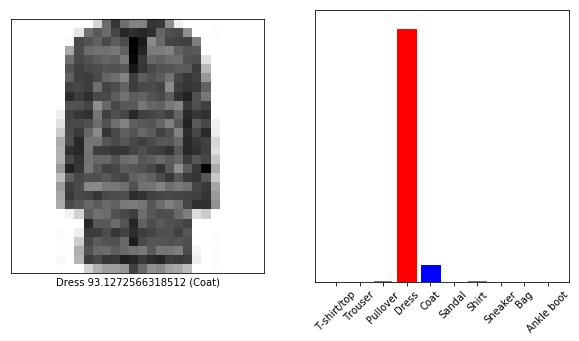

In [242]:
i = 153
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i,predict,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predict,test_labels)
plt.show()